In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/Users/niranjankalaiselvan/Downloads/Zomato-data-.csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
def sp(x):
    value=str(x).split("/")[0]
    return(value)

In [6]:
df["rate"]=df["rate"].apply(sp)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [9]:
df.shape

(148, 7)

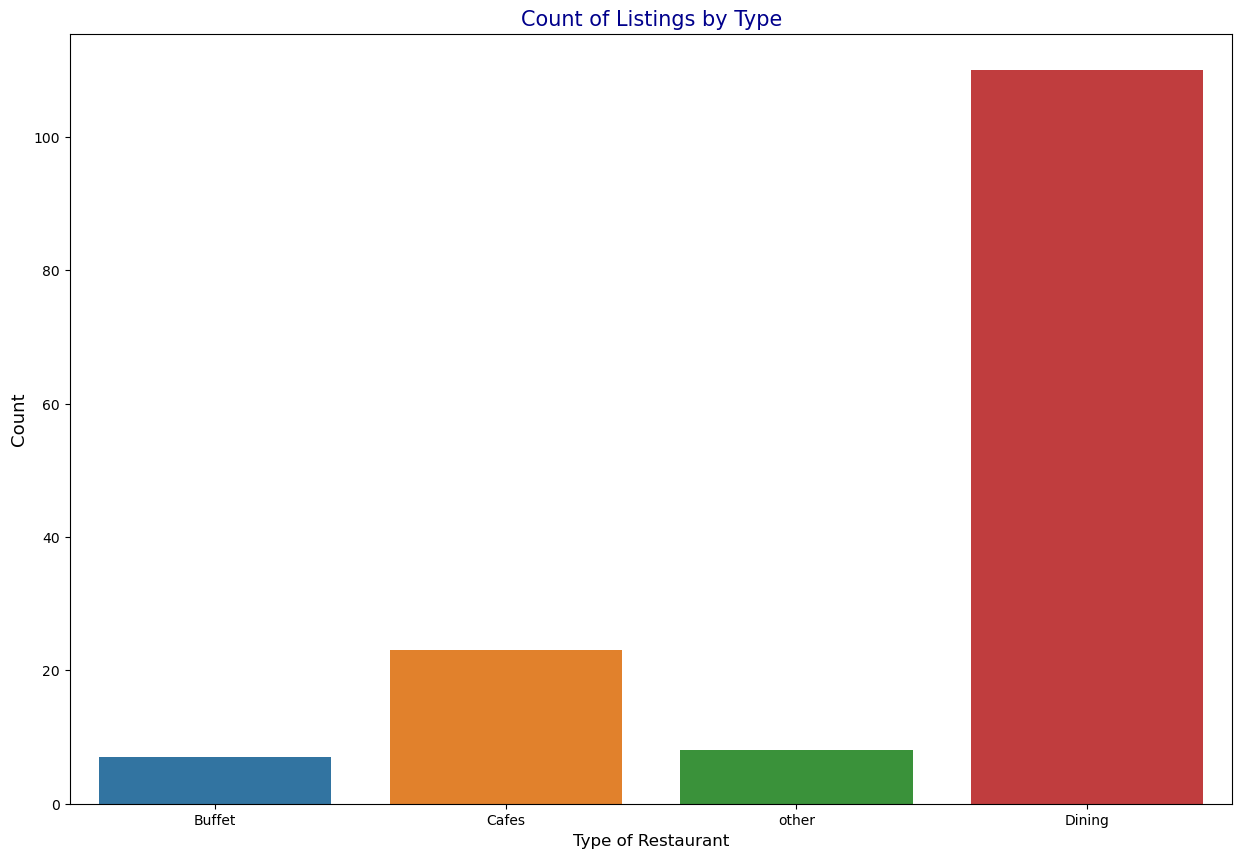

In [141]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x=df["listed_in(type)"])
plt.xlabel("Type of Restaurant",c="black",size=12)
plt.ylabel("Count",c="black",size=13)
plt.title("Count of Listings by Type",size=15,fontweight="light",c="darkblue")
plt.show()
# Conclusion: The majority of the restaurants fall into the dining category.

In [11]:
grouped_data=df.groupby("listed_in(type)")["votes"].sum()

In [12]:
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [13]:
result=pd.DataFrame({"Votes":grouped_data})

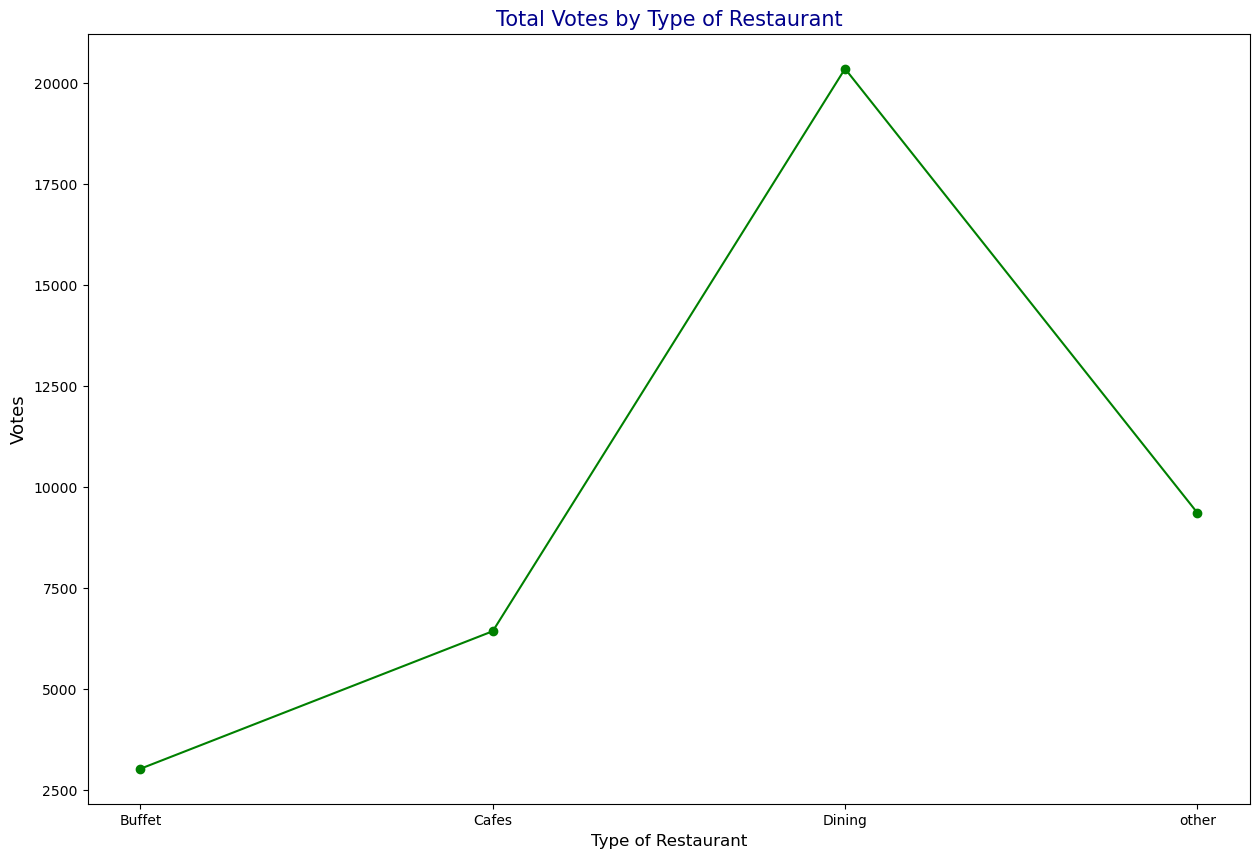

In [139]:
plt.figure(figsize=(15,10))
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Restaurant",c="black",size=12)
plt.ylabel("Votes",c="black",size=13)
plt.title("Total Votes by Type of Restaurant",size=15,fontweight="light",c="darkblue")
plt.show()
# Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [15]:
max1=df["votes"].max()

In [16]:
max_voted_res=df.loc[df["votes"]==max1,"name"]
# 38 Empire Restaurant

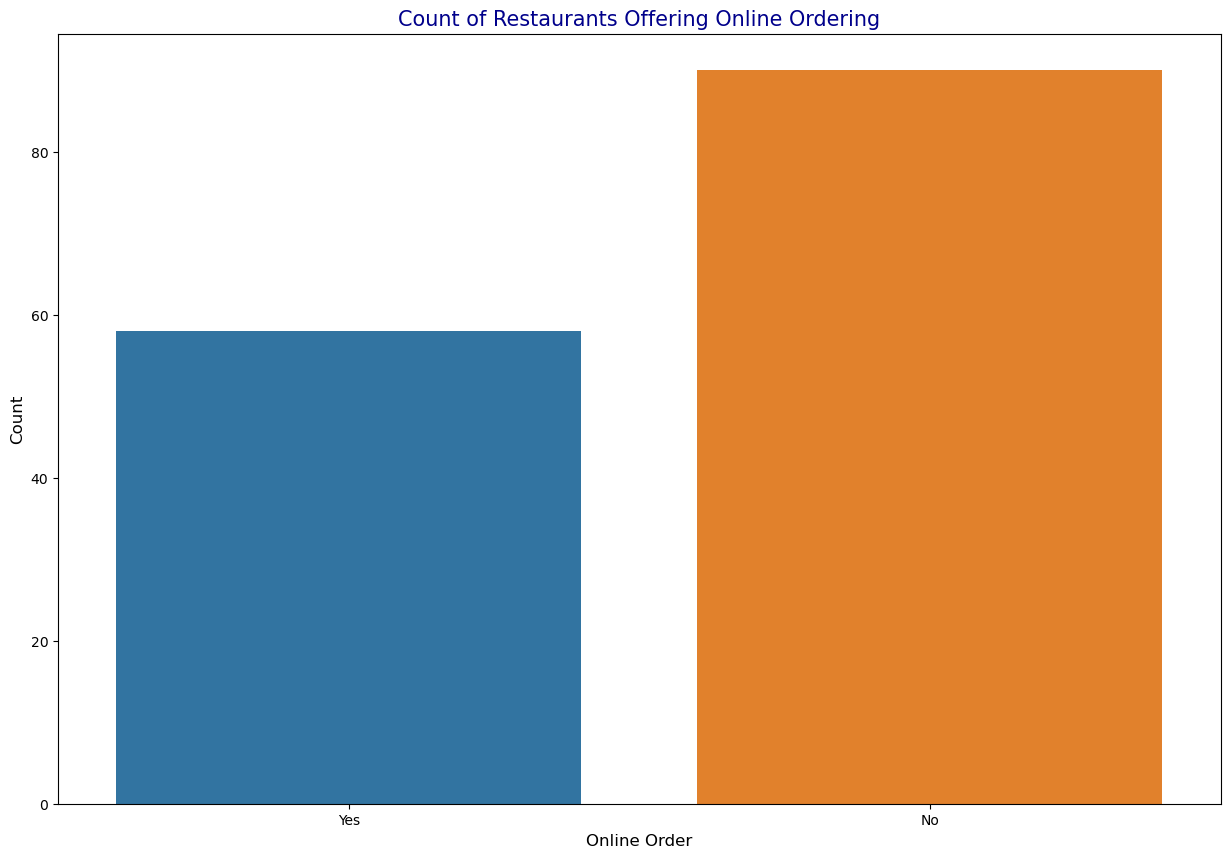

In [137]:
plt.figure(figsize=(15,10))
sns.countplot(x="online_order",data=df)
plt.xlabel("Online Order",c="black",size=12)
plt.ylabel("Count",c="black",size=12)
plt.title("Count of Restaurants Offering Online Ordering",size=15,fontweight="light",c="darkblue")
plt.show()
# Conclusion: This suggests that a majority of the restaurants do not accept online orders.

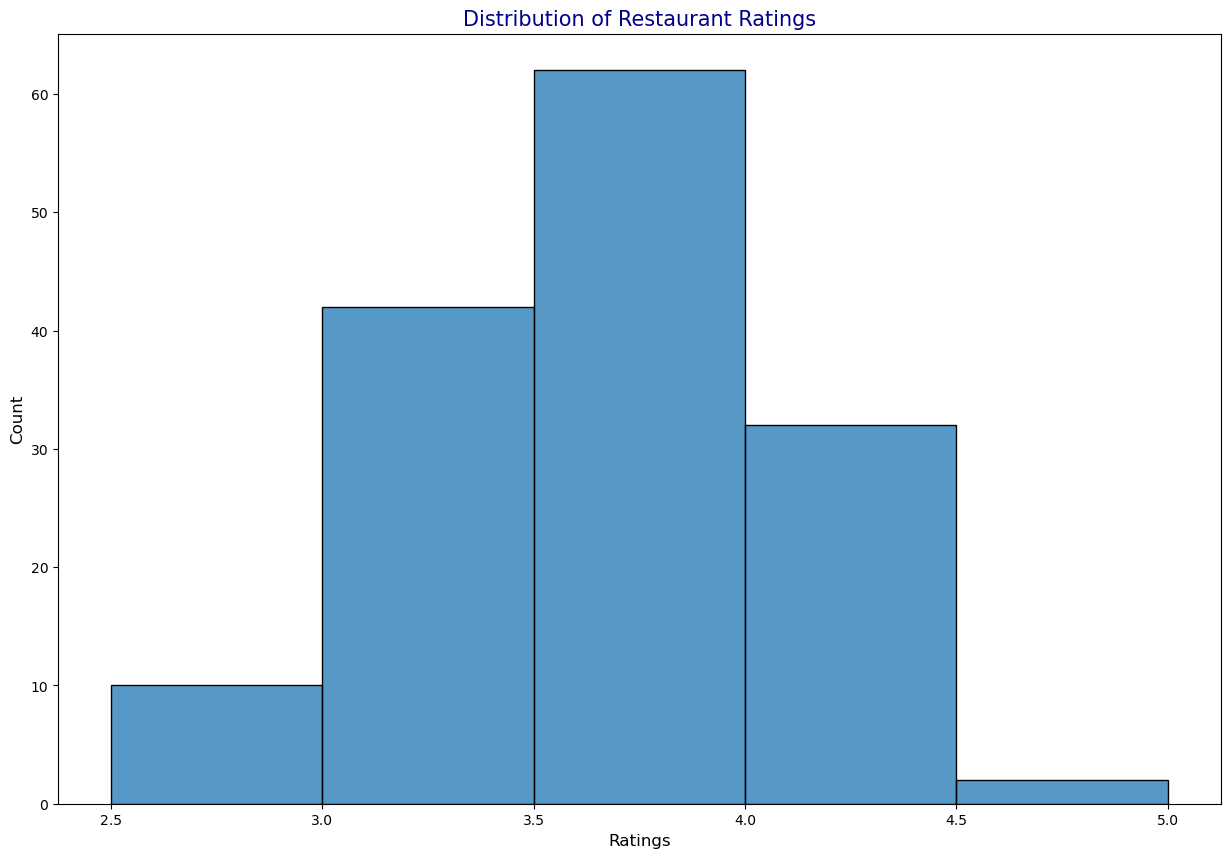

In [135]:
df["rate"]=pd.to_numeric(df["rate"],errors="coerce")
plt.figure(figsize=(15,10))
sns.histplot(data=df,x="rate",bins=[2.5,3,3.5,4,4.5,5])
plt.xticks([2.5,3,3.5,4,4.5,5])
plt.xlabel("Ratings",c="black",size=12)
plt.ylabel("Count",c="black",size=12)
plt.title("Distribution of Restaurant Ratings",size=15,fontweight="light",c="darkblue")
plt.show()
# Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

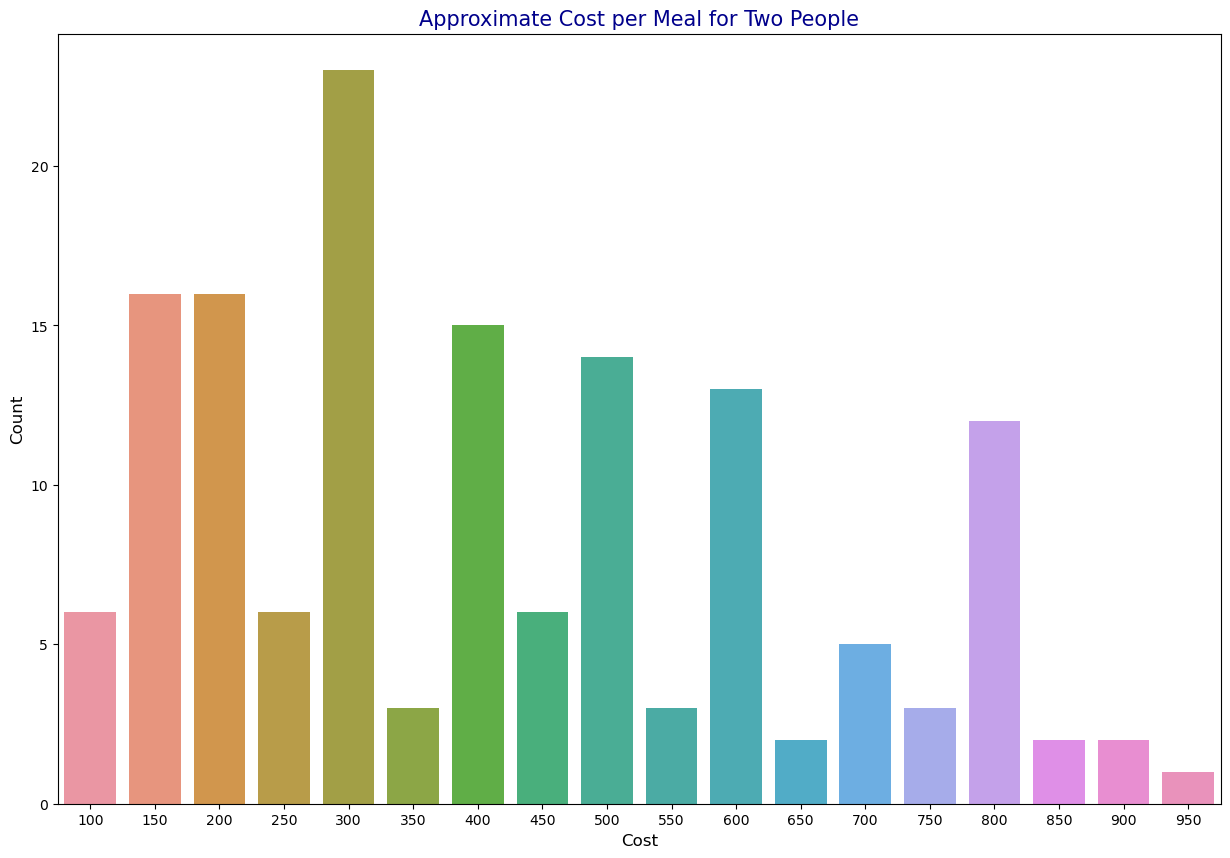

In [133]:
plt.figure(figsize=(15,10))
sns.countplot(x=df["approx_cost(for two people)"])
plt.xlabel("Cost",c="black",size=12)
plt.ylabel("Count",c="black",size=12)
plt.title("Approximate Cost per Meal for Two People",size=15,fontweight="light",c="darkblue")
plt.show()
# Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

In [143]:
df.columns
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


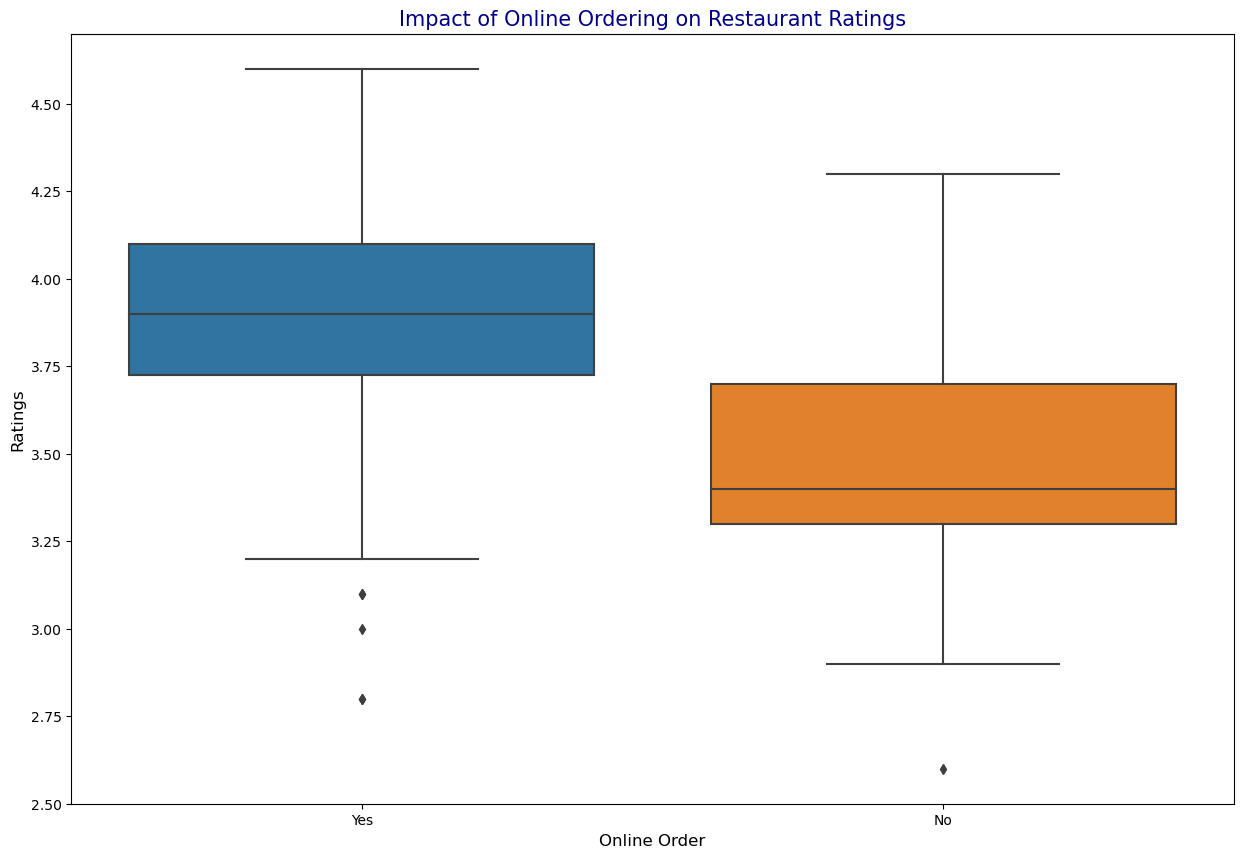

In [153]:
plt.figure(figsize=(15,10))
sns.boxplot(x="online_order",y="rate",data=df)
plt.xlabel("Online Order",c="black",size=12)
plt.ylabel("Ratings",c="black",size=12)
plt.title("Impact of Online Ordering on Restaurant Ratings",size=15,fontweight="light",c="darkblue")
plt.show()
# Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

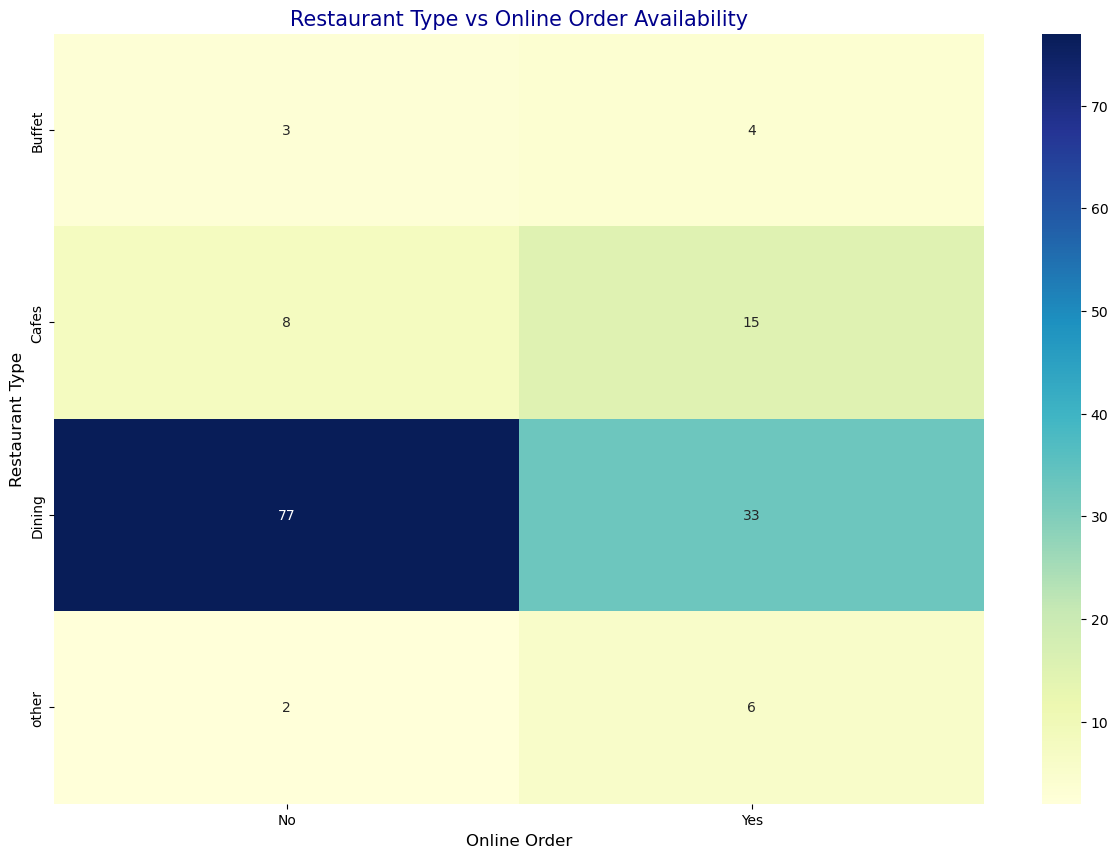

In [173]:
pivot=df.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size")
plt.figure(figsize=(15,10))
sns.heatmap(pivot,annot=True,cmap='YlGnBu', fmt='d')
plt.xlabel("Online Order",c="black",size=12)
plt.ylabel("Restaurant Type",c="black",size=12)
plt.title("Restaurant Type vs Online Order Availability",size=15,fontweight="light",c="darkblue")
plt.show()
# Conclusion: Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. 
# This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.